# Quality assessement of the data


This notebook shows how the avoca can be applied to the data.


We have different possible flags that we assign


For the input data we use some test timeseries.



In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import annotations
import logging
# Different import required
from datetime import datetime
from os import PathLike
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import the @voc@ module 
import avoca
from avoca.utils import compounds_from_df
from avoca.bindings.gcwerks import read_gcwerks

plt.style.use('default')

In [3]:
# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')

## Data format

The data is expected to be in a pandas dataframe with the 2 levels columns:

The first coumn contains the compound names, 
the second the different variables. 

Some columns report measurement metadata and are shared among the compounds so the first line is `-`. 

Reserved names for compounds columns :

* `area`: the chromatogram area 
* `C`: the concentration 
* `flag`: the flag assigned to the data point

For shared columns (starting with `-`)

* `datetime`: the date and time of the measurement
* `type`: the type of measurement (calibration=`std`, sample=`air`, blank=`blank`, ...)

In [7]:
# File availabe in the repository
data_file = Path("/home/klima/coli/qa/jfj/data.dat")
df = read_gcwerks(data_file)
compounds = compounds_from_df(df)
compounds

['benzene',
 'ethane',
 'i-butane',
 'i-pentane',
 'n-butane',
 'n-pentane',
 'propane',
 'toluene']

In [8]:
df.head()

-                          benzene                 \
                       date        sample  time type       C      area flag   
(-, datetime)                                                                 
2024-01-01 00:36:00  240101  2m_air-monch  0036  air     NaN  204363.0    1   
2024-01-01 01:46:00  240101         E-215  0146  std     NaN  191333.0   33   
2024-01-01 02:56:00  240101  2m_air-monch  0256  air  79.647  210453.0    0   
2024-01-01 04:06:00  240101  2m_air-monch  0406  air  77.714  205953.0    0   
2024-01-01 05:16:00  240101         E-215  0516  std  73.020  192999.0   32   

                               ethane            ... n-pentane          \
                         rt         C      area  ...      flag      rt   
(-, datetime)                                    ...                     
2024-01-01 00:36:00  1481.1       NaN  152169.0  ...         1  1395.6   
2024-01-01 01:46:00  1481.0       NaN  116367.0  ...        33  1395.6   
2024-01-01 02:56:00  1481.1  2019.182  153489.0  ...         0  1395.6   
2024-01-01 04:06:00  1481.1  2006.037  152500.0  ...         0  1395.6   
2024-01-01 05:16:00  1481.1  1529.451  116397.0  ...        32  1395.6   

                     propane                         toluene                 \
                           C      area flag      rt        C      area flag   
(-, datetime)                                                                 
2024-01-01 00:36:00      NaN  143018.0    1  1193.3      NaN   85307.0    1   
2024-01-01 01:46:00      NaN   63763.0   33  1193.3      NaN  800870.0   33   
2024-01-01 02:56:00  879.513  145155.0    0  1193.3   36.089   92684.0    0   
2024-01-01 04:06:00  880.772  145253.0    0  1193.2   33.503   85954.0    0   
2024-01-01 05:16:00  384.762   63622.0   32  1193.3  310.120  798441.0   32   

                             
                         rt  
(-, datetime)                
2024-01-01 00:36:00  1622.9  
2024-01-01 01:46:00  1621.9  
2024-01-01 02:56:00  1622.8  
2024-01-01 04:06:00  1622.8  
2024-01-01 05:16:00  1622.0  

[5 rows x 36 columns]

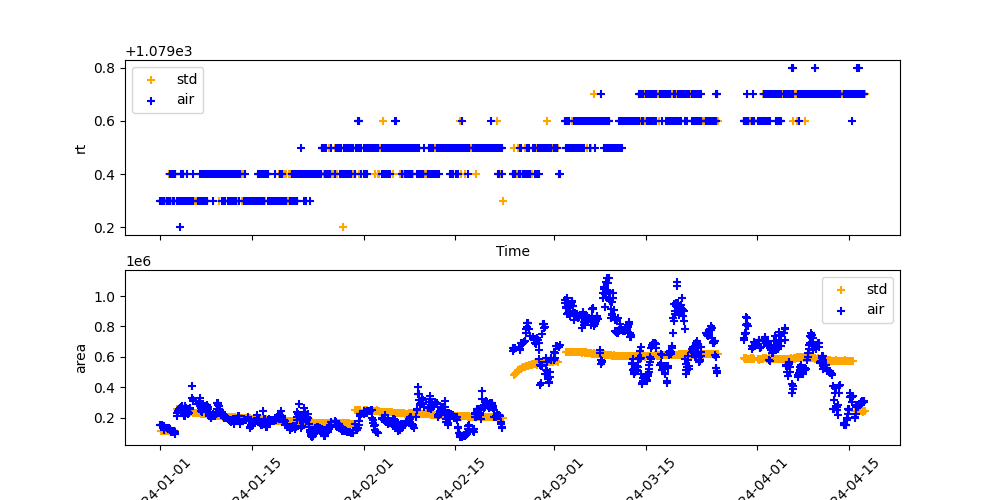

In [9]:
%matplotlib widget
# MAke a small plot to compare rt of toluene in std and air

mask_std = df[('-', 'type')] == 'std' 
mask_air = df[('-', 'type')] == 'air'

fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(10, 5))
cmp = 'ethane'
for i, var in enumerate(['rt', 'area']):
    ax = axes[i]
    col = (cmp, var)
    marker = '+'
    serie_std = df.loc[mask_std, col]
    serie_std = serie_std[serie_std != 0]
    ax.scatter(serie_std.index, serie_std.values, label='std', color='orange', marker=marker)
    serie_air = df.loc[mask_air, col]
    serie_air = serie_air[serie_air != 0]
    ax.scatter(serie_air.index, serie_air.values, label='air', color='blue', marker=marker)
    ax.set_xlabel('Time')
    ax.set_ylabel(var)
    # Rotate x ticks 
    plt.xticks(rotation=45)
    ax.legend()

<Axes: xlabel='(-, datetime)'>

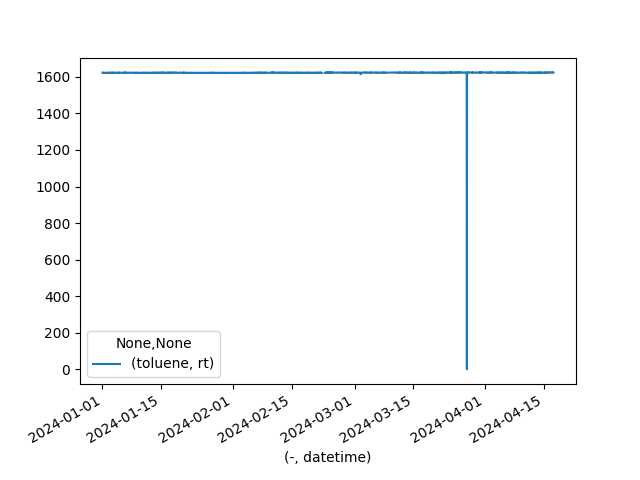

In [10]:
df.plot(y=("toluene", "rt"))

In our case the data contains already some compounds, the concentration values and some flags

In [6]:
print(f"Lenght: {len(df)} measurements")
compounds = compounds_from_df(df)
print(f"Compounds: {compounds}")
df.head()

Lenght: 2560 measurements
Compounds: ['benzene', 'ethane', 'i-butane', 'i-pentane', 'n-butane', 'n-pentane', 'propane', 'toluene']


-           benzene                         \
                       date time type       C      area flag      rt   
(-, datetime)                                                          
2023-01-01 00:00:00  230101    0  air     NaN  103973.0    1  1438.2   
2023-01-01 01:01:00  230101  110  std     NaN  384858.0   33  1438.2   
2023-01-01 02:02:00  230101  220  air  21.955  135349.0    0  1438.3   
2023-01-01 03:03:00  230101  330  air  24.501  150852.0    0  1438.2   
2023-01-01 04:04:00  230101  440  std  63.480  385548.0   32  1438.2   

                       ethane                 ... n-pentane      propane  \
                            C      area flag  ...      flag  rt        C   
(-, datetime)                                 ...                          
2023-01-01 00:00:00       NaN  117963.0    1  ...       129 NaN      NaN   
2023-01-01 01:01:00       NaN  237867.0   33  ...       161 NaN      NaN   
2023-01-01 02:02:00   798.363  144050.0    0  ...       129 NaN  177.861   
2023-01-01 03:03:00   845.412  152551.0    0  ...       129 NaN  200.926   
2023-01-01 04:04:00  1324.189  237907.0   32  ...       161 NaN  390.441   

                                            toluene                          
                         area flag      rt        C       area flag      rt  
(-, datetime)                                                                
2023-01-01 00:00:00   46363.0    1  1158.5      NaN    17625.0    1  1545.7  
2023-01-01 01:01:00  158355.0   33  1158.5      NaN  2372172.0   33  1544.9  
2023-01-01 02:02:00   72918.0    0  1158.5    8.834    41706.0    0  1545.7  
2023-01-01 03:03:00   82522.0    0  1158.5    4.559    21507.0    0  1545.7  
2023-01-01 04:04:00  159200.0   32  1158.5  503.174  2366060.0   32  1544.9  

[5 rows x 35 columns]

### Creating an assigner of the data

avoca works with assigner objects

These objects are first trained on some 'valid' data and then used to assign flags to new data

Note that you can also generete this using a config file. 
See example: `config.yaml`

In [ ]:
from avoca.qa_class.concs import ExtremeConcentrations
from avoca.qa_class.zscore import XY_Correlations, Multiple_XY_Correlations


# Create assingers for each compound
assigners = [
    exteme_concs := ExtremeConcentrations(compounds=compounds),
    XY_Correlations(
        compounds=["ethane", "propane", "n-butane"], variable="C", threshold=4.0
    ),
    # xy_benzene_toluene := XY_Correlations(compounds=["benzene", "toluene"], variable="C"),
    multiple_assigner := Multiple_XY_Correlations(
        number_of_regression=3, compounds=["benzene", "toluene"], variable="C"
    ),
]

In [ ]:
from avoca.manager import AssignerManager

# Assume the data has not been checked since the first of April
limit_date = datetime(2023, 4, 1)
# Fit the assigners to the data
df_train = df.loc[:limit_date]
df_test = df.loc[limit_date:]
for assigner in assigners:
    # First we train the assigner on the training data
    AssignerManager.train(assigner, df_train)
    # Then we apply the assigner on the test data, this will add the flags to the dataframe
    AssignerManager.apply(assigner, df_test)


### Flags 

Each assigner will put flags on the data.

In [ ]:
from avoca.flags import QA_Flag

for assigner in assigners:
    print(type(assigner).__name__, '\t', assigner.flag)

In [ ]:
# Plot ethene vs propane
fig, ax = plt.subplots(figsize=(4, 4))
mask = df[("-", "type")] == "air"

x_sub = 'ethane'
y_sub = 'propane'
unit = 'pmol/mol'

this_df = df_test.loc[mask]
ax.scatter(
    this_df[(x_sub, "C")],
    this_df[(y_sub, "C")],
    label="Test Data",
    color="darkblue",
    s=2,
)
# Get flagged data
mask_uncorrelated = (
    (this_df[(x_sub, "flag")] & QA_Flag.UNCORRELATED.value) != 0
) | ((this_df[(y_sub, "flag")] & QA_Flag.UNCORRELATED.value) != 0)
# Put crosses on uncorrelated data
ax.scatter(
    this_df.loc[mask_uncorrelated, (x_sub, "C")],
    this_df.loc[mask_uncorrelated, (y_sub, "C")],
    marker="x",
    label="Uncorrelated",
    s=20,
    color="red",
)
ax.legend()
ax.set_xlabel(f"{x_sub} [{unit}]")
ax.set_ylabel(f"{y_sub} [{unit}]")
# Make the background transparent
fig.patch.set_alpha(0)


In [ ]:
# Plot the multiple correlation
assigner = multiple_assigner
fig, ax = plt.subplots(figsize=(5, 3))
mask = np.isin(df[("-", "type")], assigner.runtypes)

x_sub = 'benzene'
y_sub = 'toluene'
slopes = [l.weight.item() for l in assigner._models[(x_sub, y_sub)].linears]
stds = assigner._stds[(x_sub, y_sub)]

this_df = df.loc[mask]
ax.scatter(
    this_df[(x_sub, "C")],
    this_df[(y_sub, "C")],
    label="Test Data",
    color="darkblue",
    s=2,
)
# Get flagged data
mask_uncorrelated = (
    (this_df[(x_sub, "flag")] & QA_Flag.UNCORRELATED.value) != 0
) | ((this_df[(y_sub, "flag")] & QA_Flag.UNCORRELATED.value) != 0)

ax.scatter(
    this_df.loc[mask_uncorrelated, (x_sub, "C")],
    this_df.loc[mask_uncorrelated, (y_sub, "C")],
    marker="x",
    label="Uncorrelated",
    s=20,
    color="red",
)
x = np.linspace(np.nanmin(this_df[(x_sub, "C")]), np.nanmax(this_df[(x_sub, "C")]), 100)
for slope, std in zip(slopes, stds):
    ax.plot(x, slope * x, color="black", linewidth=1, linestyle="--")
    # Fill the std area between the lines
    print(std)
    ax.fill_between(
        x,
        np.max(slope * x - std * assigner.threshold, 0),
        slope * x + std * assigner.threshold,
        color="black",
        alpha=0.1,
        linewidth=0,
    )

In [ ]:
# Plot toluene benzene
fig, ax = plt.subplots(figsize=(5, 3))
mask = df[("-", "type")] == "air"

sub = 'n-butane'

this_df = df_test.loc[mask].loc[limit_date:]
ax.scatter(
    this_df.index,
    this_df[(sub, "C")],
    label="Data",
    color="darkblue",
    s=1,
)
# Get flagged data
mask_extreme = (
    (this_df[(sub, "flag")] & QA_Flag.EXTREME_VALUE.value) != 0
) 
# Put crosses on uncorrelated data
ax.scatter(
    this_df.loc[mask_extreme].index,
    this_df.loc[mask_extreme, (sub, "C")],
    marker="x",
    label="Extreme value",
    s=10,
    color="red",
)
ax.legend()
ax.set_xlabel("Date")
ax.set_ylabel(sub)
# Rotate the xticks
ax.tick_params(axis='x', rotation=25)
# Make the background transparent
fig.patch.set_alpha(0)


In [ ]:
exteme_concs.plot()